In [1]:
import os 
import sys
import pygwalker as pyg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:

#Importing Configs
# Define the path where config.py is located
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [3]:
df = pd.read_csv(f"{Sentiment_models}/{Body}_{Model}_advanced_sentiment_texts.csv")
df_2 = pd.read_csv(f"{Sentiment_models}/{Body_2}_{Model_2}_advanced_sentiment_texts.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kylenabors/Documents/Database/Models/Sentiment Analysis Models/Fed_Minutes_advanced_sentiment_texts.csv'

In [ ]:
dummies = pd.get_dummies(df['sentiment'], dtype=float)
df = df.join(dummies)
dummies_2 = pd.get_dummies(df_2['sentiment'], dtype=float)
df_2 = df_2.join(dummies)

In [ ]:
print(df.head())
print(df_2.head())

   Unnamed: 0        date                                title  \
0           0  2023-08-31  Disinflation and the Phillips curve   
1           1  2023-08-31  Disinflation and the Phillips curve   
2           2  2023-08-31  Disinflation and the Phillips curve   
3           3  2023-08-31  Disinflation and the Phillips curve   
4           4  2023-08-31  Disinflation and the Phillips curve   

              type                                            segment  \
0  Isabel Schnabel  speech disinflation and the phillips curve spe...   
1  Isabel Schnabel  activity has moderated visibly , and forwardlo...   
2  Isabel Schnabel  but important pockets of resilience remain , e...   
3  Isabel Schnabel  headline inflation has come down , mainly on t...   
4  Isabel Schnabel  but underlying price pressures remain stubborn...   

  sentiment  confidence  neg  pos  
0       pos         1.0  0.0  1.0  
1       pos         0.8  0.0  1.0  
2       pos         1.0  0.0  1.0  
3       neg         

In [ ]:
df_group = df.copy(deep=True)
df_group = df_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment', 'sentiment', 'confidence'])
#df_group['monthly'] = df_group['date'].str[0:7]
df_group['monthly'] = df_group['date']
df_group = df_group[['monthly', 'pos', 'neg']]
df_group = df_group.groupby('monthly', as_index = False).mean()
df_group['net'] = df_group['pos'] - df_group['neg']
df_group['net'] = df_group['net'] - df_group['net'].mean()
print(df_2.head()) 

df_2_group = df_2.copy(deep=True)
df_2_group = df_2_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment', 'sentiment', 'confidence'])
df_2_group['date'] = df_2_group['date'].astype(str)
df_2_group['monthly'] = df_2_group['date']
#df_2_group['monthly'] = df_2_group['date'].str[0:7]
df_2_group = df_2_group[['monthly', 'pos', 'neg']]
df_2_group = df_2_group.groupby('monthly', as_index = False).mean()
df_2_group['net'] = df_2_group['pos'] - df_group['neg']
df_2_group['net'] = df_2_group['net'] - df_2_group['net'].mean()
print(df_group.head())
print(df_2_group.head())

df_merged = df_group.merge(df_2_group, on='monthly', how='inner')
df_merged.fillna(0, inplace=True)

   Unnamed: 0        date                             title  \
0           0  1998-11-06  Examining community reinvestment   
1           1  1998-11-06  Examining community reinvestment   
2           2  1998-11-06  Examining community reinvestment   
3           3  1998-11-06  Examining community reinvestment   
4           4  1998-11-06  Examining community reinvestment   

                          type  \
0  Governor Edward M. Gramlich   
1  Governor Edward M. Gramlich   
2  Governor Edward M. Gramlich   
3  Governor Edward M. Gramlich   
4  Governor Edward M. Gramlich   

                                             segment sentiment  confidence  \
0  examining community reinvestment the federal r...       pos         1.0   
1  our well known function is to set monetary pol...       pos         1.0   
2      that is not what i plan to talk about today .       pos         1.0   
3  what i would like to talk about is one of the ...       pos         1.0   
4  this act was passed bac

In [ ]:
print(df_merged.head())

df_merged.rename(columns={'pos_x': 'pos_1', 'neg_x': 'neg_1', 'net_x': 'net_1', 'pos_y': 'pos_2', 'neg_y': 'neg_2', 'net_y': 'net_2'}, inplace=True)

print(df_merged.head())

      monthly     pos_x     neg_x     net_x     pos_y     neg_y     net_y
0  1998-09-18  0.847826  0.152174  0.188783  0.543624  0.456376 -0.152547
1  1998-10-22  0.771654  0.228346  0.036438  0.619247  0.380753  0.002965
2  1998-11-06  0.869048  0.130952  0.231226  0.472050  0.527950 -0.258293
3  1999-01-15  0.906780  0.093220  0.306690  0.817460  0.182540  0.085956
4  1999-02-24  0.803279  0.196721  0.099688  0.619048  0.380952 -0.013901
      monthly     pos_1     neg_1     net_1     pos_2     neg_2     net_2
0  1998-09-18  0.847826  0.152174  0.188783  0.543624  0.456376 -0.152547
1  1998-10-22  0.771654  0.228346  0.036438  0.619247  0.380753  0.002965
2  1998-11-06  0.869048  0.130952  0.231226  0.472050  0.527950 -0.258293
3  1999-01-15  0.906780  0.093220  0.306690  0.817460  0.182540  0.085956
4  1999-02-24  0.803279  0.196721  0.099688  0.619048  0.380952 -0.013901


In [ ]:
df_merged['net_diff'] = df_merged['net_1'] - df_merged['net_2']

In [ ]:
funds = pd.read_excel('/Users/kylenabors/Documents/Database/Other Data/FedFundsRate.xlsx', sheet_name='Monthly')
print(funds.head())
energy = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/Energy Prices/US Energy CPI.csv')
print(energy.head())

        DATE  FEDFUNDS Date Adjusted
0 1999-12-31      5.45    2000-01-01
1 2000-01-31      5.73    2000-02-01
2 2000-02-29      5.85    2000-03-01
3 2000-03-31      6.02    2000-04-01
4 2000-04-30      6.27    2000-05-01
         DATE  CPIENGSL
0  2000-01-01     115.0
1  2000-02-01     118.8
2  2000-03-01     124.3
3  2000-04-01     120.9
4  2000-05-01     120.0


In [ ]:
funds['Diff'] = funds['FEDFUNDS'].diff()


In [ ]:
df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)

In [ ]:
gwalker = pyg.walk(df_merged)

Box(children=(HTML(value='<div id="ifr-pyg-33" style="height: auto">\n    <head>\n        <meta http-equiv="Co…

In [ ]:
print(df_merged.describe())

            pos_1       neg_1       net_1       pos_2       neg_2       net_2  \
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     0.755728    0.244272    0.004587    0.696491    0.303509   -0.002737   
std      0.106308    0.106308    0.212616    0.111717    0.111717    0.140881   
min      0.450000    0.000000   -0.606869    0.343750    0.000000   -0.481259   
25%      0.685911    0.168769   -0.135048    0.619286    0.223713   -0.085691   
50%      0.764706    0.235294    0.022543    0.706049    0.293951    0.008623   
75%      0.831231    0.314089    0.155594    0.776287    0.380714    0.085875   
max      1.000000    0.550000    0.493131    1.000000    0.656250    0.444973   

         net_diff  
count  246.000000  
mean     0.007324  
std      0.264631  
min     -0.689488  
25%     -0.198224  
50%      0.028909  
75%      0.219724  
max      0.685823  


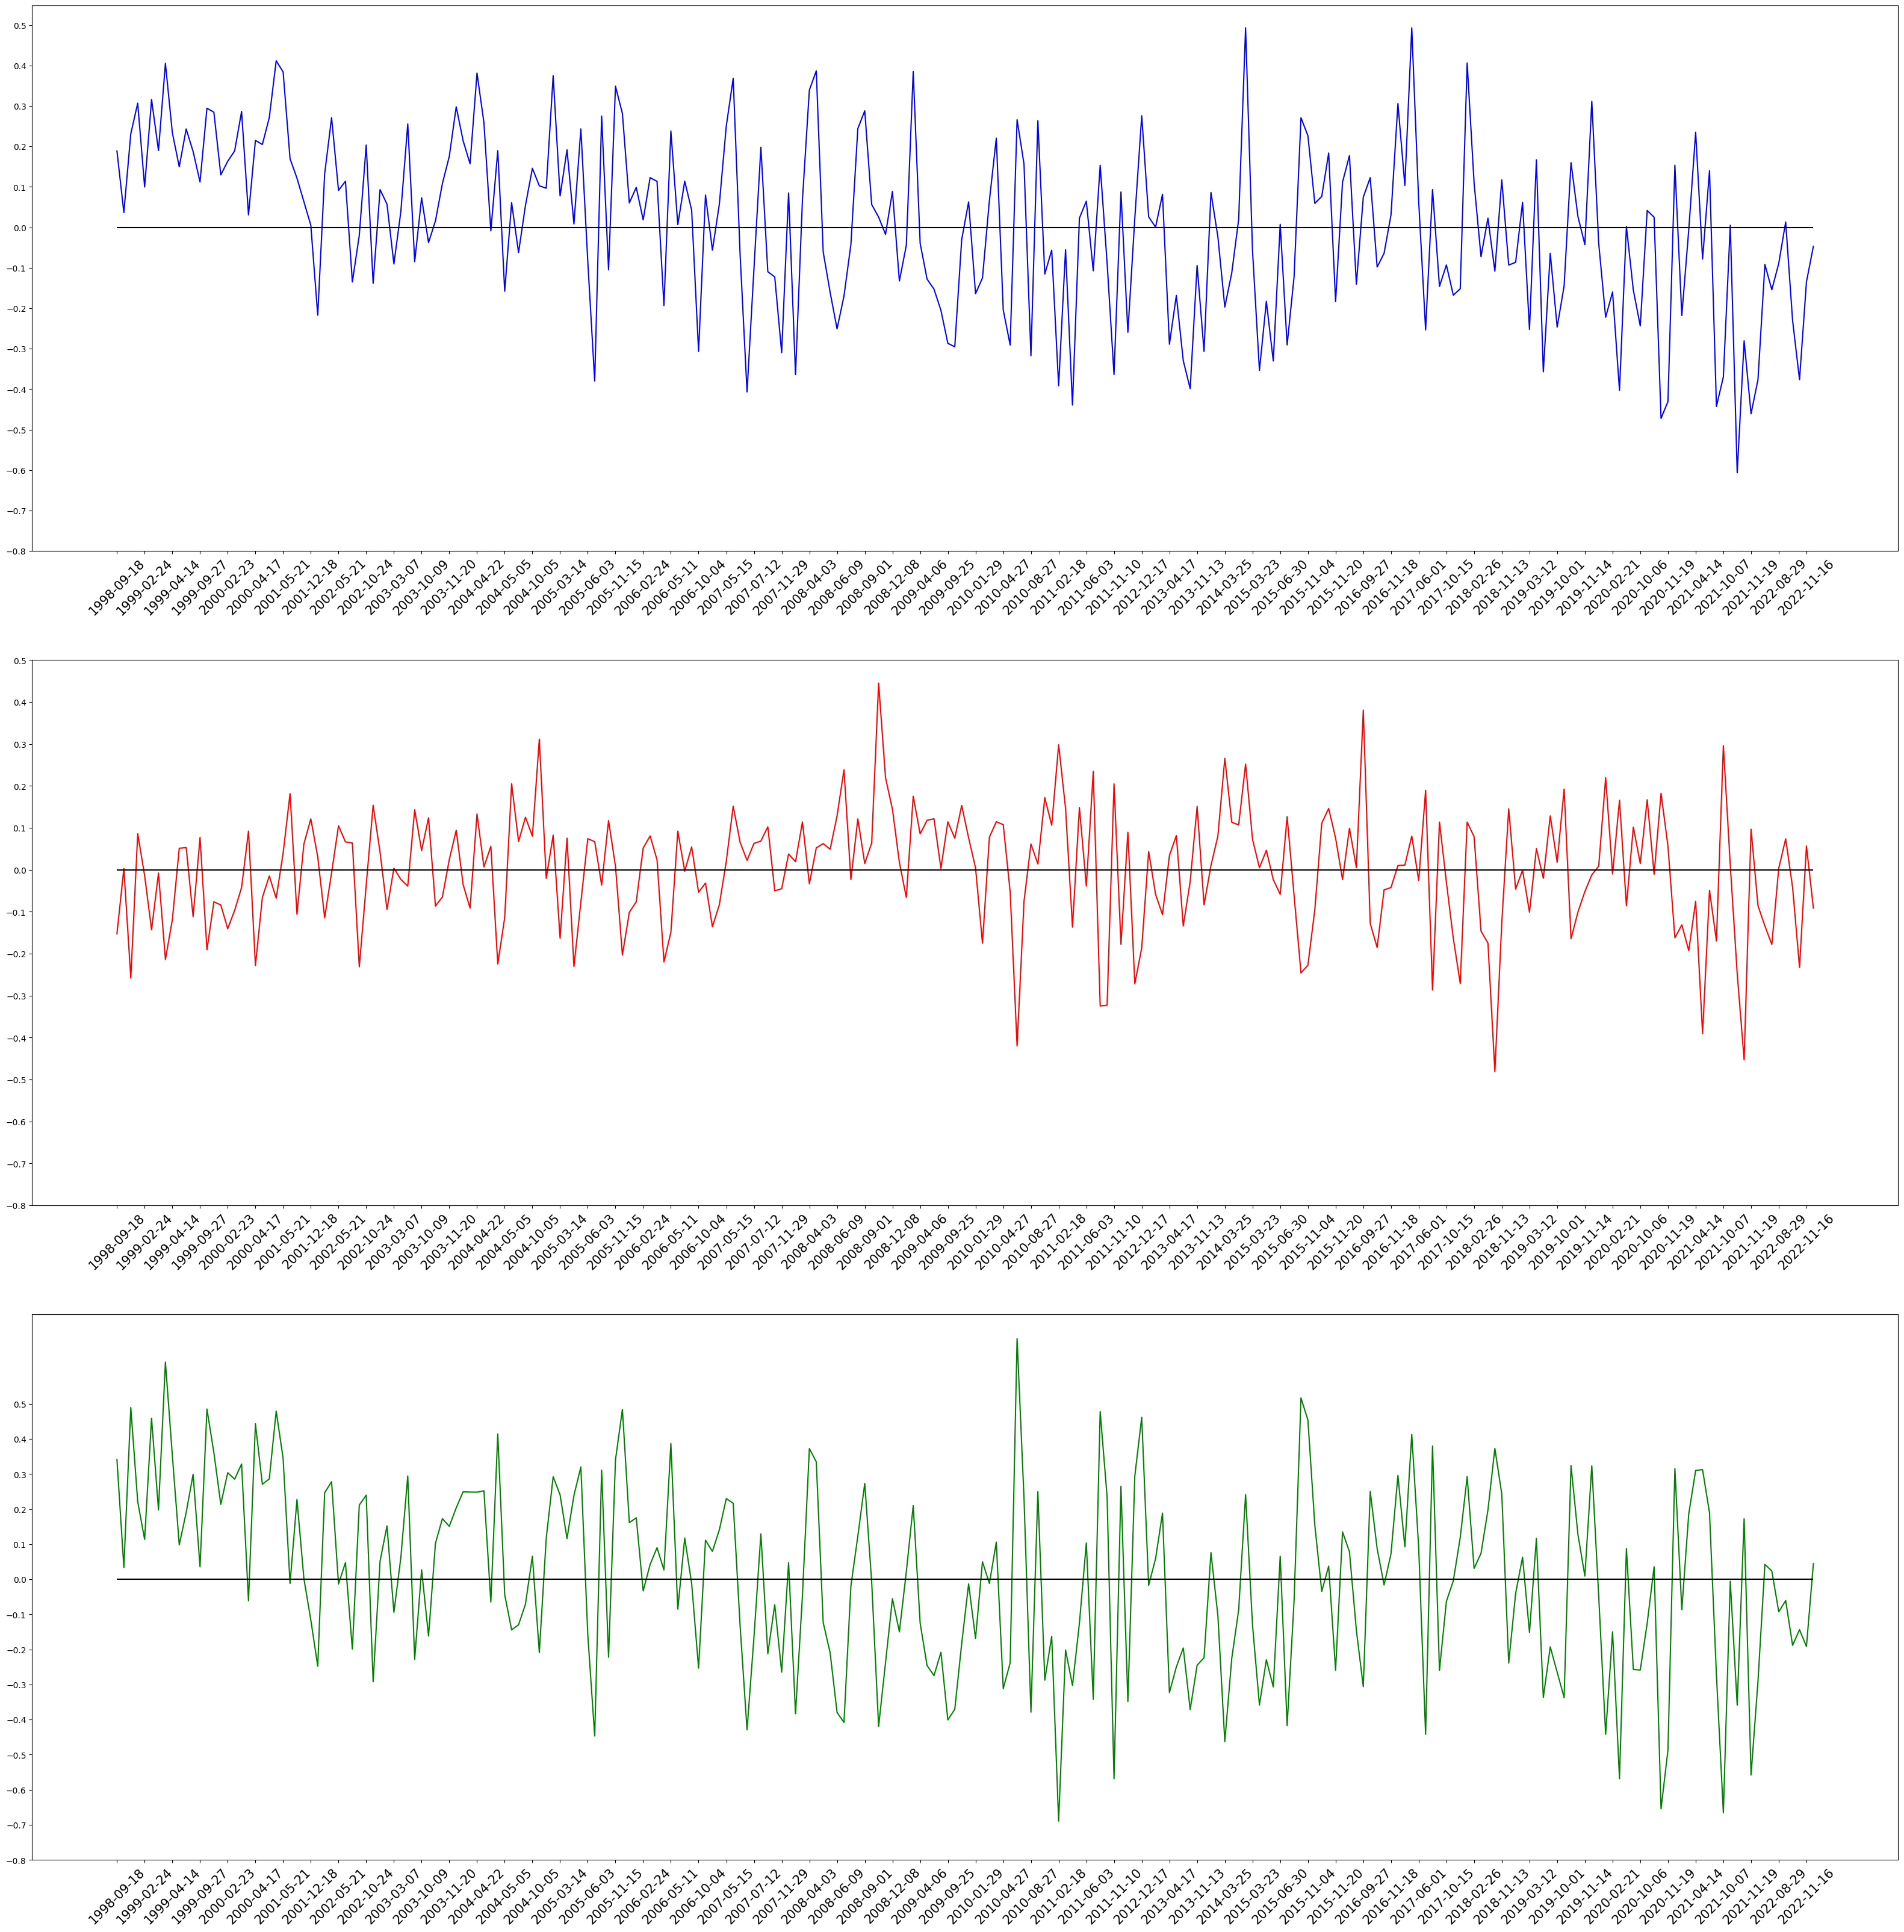

In [ ]:


# Create a list of x-axis tick positions
num_ticks = 60  # Adjust this number as needed
x_tick_positions = df_merged['monthly'].iloc[::len(df_merged) // num_ticks].tolist()

y = 0
fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(df_merged['monthly'], df_merged['net_1'], color='blue', label='Net Sentiment')
axs[1].plot(df_merged['monthly'], df_merged['net_2'], color='red', label='Net Sentiment')
axs[0].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
axs[1].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')

axs[2].plot(df_merged['monthly'], df_merged['net_diff'], color='green', label='Net Sentiment')
axs[2].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_yticks(np.arange(-0.8, 0.6, .1))
axs[1].set_yticks(np.arange(-0.8, 0.6, .1))
axs[2].set_yticks(np.arange(-0.8, 0.6, .1))

plt.show()


In [ ]:
x = 0
l = 20
for i in range(l):
    x += 1
    if x % 2 == 1:
        print(x)

1
3
5
7
9
11
13
15
17
19
